# MMS in pySPEDAS

Eric Grimes (egrimes@igpp.ucla.edu)

## Getting Started

To get up and running with Python, virtual environments and pySPEDAS, see:

http://spedas.org/mms/getting_started_with_pyspedas.pdf

Python 3.5 or later is required; we recommend installing Anaconda to get everything up and running. 

### All of this depends on the hard work of the pyTplot developers at LASP
To learn more about pyspedas:

https://pyspedas.readthedocs.io/

### Virtual environments

It's best to setup and use virtual environments when using Python - these allow you to avoid common dependency problems when you install multiple packages

`python -m venv pyspedas-tutorial`

Then, to run the virtual environment, on Windows:

`.\pyspedas-tutorial\Scripts\activate`

and on macOS / Linux:

`source pyspedas-tutorial/bin/activate`

To exit the current virtual environment, type `deactivate`

### Install pySPEDAS

`pip install pyspedas`

### Upgrade pySPEDAS

`pip install pyspedas --upgrade`


### Local data directory
We use environment variables to set the local data directories:

    SPEDAS_DATA_DIR (root data directory for all missions in pySPEDAS, and most missions in SPEDAS)
    e.g., if you set SPEDAS_DATA_DIR=/Users/eric/data, your data will be stored in /Users/eric/data/mms/
    
    MMS_DATA_DIR (if set, overrides SPEDAS_DATA_DIR)
    e.g., if you set MMS_DATA_DIR=/Users/eric/data/mms, your data will be stored in /Users/eric/data/mms/

### Network mirror data directory 
To set your network mirror directory, use the `MMS_MIRROR_DATA_DIR` environment variable. Just as in IDL, if you set the mirror and provide the `no_update` keyword to the load routines, pySPEDAS will check for the data on the network mirror (and if it exists, it will copy the data to your local data directory before loading it)

### Load routines
The load routines in pySPEDAS can be accessed using the syntax: 

    pyspedas.mission.instrument()
    
and just as in IDL, the options are set by keywords you provide to these procedures. Note: for MMS, you can also still access the load routines with their IDL names via:

    pyspedas.projects.mms_load_xxx()

e.g., 

    from pyspedas import mms_load_fpi
    mms_load_fpi(trange=...)
    
The load routines supported include:

- Fluxgate Magnetometer (FGM)
- Search-coil Magnetometer (SCM)
- Level 3 FGM+SCM Data (FSM)
- Electric field Double Probe (EDP)
- Electron Drift Instrument (EDI)
- Fast Plasma Investigation (FPI)
- Hot Plasma Composition Analyzer (HPCA)
- Energetic Ion Spectrometer (EIS)
- Fly's Eye Energetic Particle Sensor (FEEPS)
- Active Spacecraft Potential Control (ASPOC)
- Ephemeris and Coordinates (MEC)
- Digital Signal Processor (DSP)

This command sets up the PySPEDAS environment when running in Google Colab.  You can skip it or comment it out if you're running this notebook in an environment that already has PySPEDAS installed.

In [ ]:
!pip install pyspedas

## Import the pyspedas package

In [1]:
import pyspedas

## Import tplot from the pyspedas package (to plot data)

Note: `pyspedas` will be installed when you install pySPEDAS.

In [2]:
from pyspedas import tplot

## Find keywords supported by the load routines

In [3]:
help(pyspedas.projects.mms.fgm)

Help on function mms_load_fgm in module pyspedas.mms:

mms_load_fgm(*args, **kwargs)
    This function loads FGM data into tplot variables
    
    Parameters:
        trange : list of str
            time range of interest [starttime, endtime] with the format 
            'YYYY-MM-DD','YYYY-MM-DD'] or to specify more or less than a day 
            ['YYYY-MM-DD/hh:mm:ss','YYYY-MM-DD/hh:mm:ss']
    
        probe : str or list of str
            list of probes, valid values for MMS probes are ['1','2','3','4']. 
    
        data_rate : str or list of str
            instrument data rates for FGM include 'brst' 'fast' 'slow' 'srvy'. The
            default is 'srvy'.
    
        level : str
            indicates level of data processing. the default if no level is specified is 'l2'
    
        datatype : str or list of str
            no datatype for FGM instrument (all science data are loaded)
    
        get_support_data: bool
            Data with an attribute "VAR_TYPE" with a v

## Load burst-mode FGM data for all 4 probes

Note: the load routines support the `time_clip` keyword (like in IDL); if you request a small trange without the `time_clip` keyword set to `True`, you will probably get some data outside of the requested trange

In [4]:
data = pyspedas.projects.mms.fgm(probe=[1, 2, 3, 4], trange=['2015-10-16/13:06', '2015-10-16/13:07'], data_rate='brst')

18-May-20 09:28:02: Loading /Volumes/data/data/mms/mms1/fgm/brst/l2/2015/10/16/mms1_fgm_brst_l2_20151016130524_v4.18.1.cdf
18-May-20 09:28:02: Loading /Volumes/data/data/mms/mms2/fgm/brst/l2/2015/10/16/mms2_fgm_brst_l2_20151016130524_v4.18.0.cdf
18-May-20 09:28:02: Loading /Volumes/data/data/mms/mms3/fgm/brst/l2/2015/10/16/mms3_fgm_brst_l2_20151016130524_v4.18.0.cdf
18-May-20 09:28:02: Loading /Volumes/data/data/mms/mms4/fgm/brst/l2/2015/10/16/mms4_fgm_brst_l2_20151016130524_v4.18.0.cdf


The lengths of x and y do not match!
mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
The lengths of x and y do not match!
mms2_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
The lengths of x and y do not match!
mms3_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
The lengths of x and y do not match!
mms4_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
Loaded variables:
mms1_fgm_b_gse_brst_l2
mms1_fgm_b_gsm_brst_l2
mms1_fgm_b_dmpa_brst_l2
mms1_fgm_b_bcs_brst_l2
mms1_fgm_flag_brst_l2
mms1_fgm_r_gse_brst_l2
mms1_fgm_r_gsm_brst_l2
mms1_fgm_hirange_brst_l2
mms1_fgm_bdeltahalf_brst_l2
mms1_fgm_stemp_brst_l2
mms1_fgm_etemp_brst_l2
mms1_fgm_mode_brst_l2
mms1_fgm_rdeltahalf_brst_l2
mms2_fgm_b_gse_brst_l2
mms2_fgm_b_gsm_brst_l2
mms2_fgm_b_dmpa_brst_l2
mms2_fgm_b_bcs_brst_l2
mms2_fgm_flag_brst_l2
mms2_fgm_r_gse_brst_l2
mms2_fgm_r_gsm_brst_l2
mms2_fgm_hirange_brst_l2
mms2_fgm_bdeltahalf_brst_l2
mms2_fgm_stemp_brst_l2
mms2_fgm_etemp_brst_l2
mms2_fgm_mode_brst_l2
mms2_fgm_rdelt

In [5]:
data

['mms1_fgm_b_gse_brst_l2',
 'mms1_fgm_b_gsm_brst_l2',
 'mms1_fgm_b_dmpa_brst_l2',
 'mms1_fgm_b_bcs_brst_l2',
 'mms1_fgm_flag_brst_l2',
 'mms1_fgm_r_gse_brst_l2',
 'mms1_fgm_r_gsm_brst_l2',
 'mms1_fgm_hirange_brst_l2',
 'mms1_fgm_bdeltahalf_brst_l2',
 'mms1_fgm_stemp_brst_l2',
 'mms1_fgm_etemp_brst_l2',
 'mms1_fgm_mode_brst_l2',
 'mms1_fgm_rdeltahalf_brst_l2',
 'mms2_fgm_b_gse_brst_l2',
 'mms2_fgm_b_gsm_brst_l2',
 'mms2_fgm_b_dmpa_brst_l2',
 'mms2_fgm_b_bcs_brst_l2',
 'mms2_fgm_flag_brst_l2',
 'mms2_fgm_r_gse_brst_l2',
 'mms2_fgm_r_gsm_brst_l2',
 'mms2_fgm_hirange_brst_l2',
 'mms2_fgm_bdeltahalf_brst_l2',
 'mms2_fgm_stemp_brst_l2',
 'mms2_fgm_etemp_brst_l2',
 'mms2_fgm_mode_brst_l2',
 'mms2_fgm_rdeltahalf_brst_l2',
 'mms3_fgm_b_gse_brst_l2',
 'mms3_fgm_b_gsm_brst_l2',
 'mms3_fgm_b_dmpa_brst_l2',
 'mms3_fgm_b_bcs_brst_l2',
 'mms3_fgm_flag_brst_l2',
 'mms3_fgm_r_gse_brst_l2',
 'mms3_fgm_r_gsm_brst_l2',
 'mms3_fgm_hirange_brst_l2',
 'mms3_fgm_bdeltahalf_brst_l2',
 'mms3_fgm_stemp_brst_l2',

In [6]:
tplot(['mms1_fgm_b_gsm_brst_l2', 'mms1_fgm_b_gse_brst_l2'])

## List the tplot variables loaded

In [7]:
from pyspedas import tplot_names

In [8]:
variables_loaded = tplot_names()

0 : mms1_fgm_b_gse_brst_l2
1 : mms1_fgm_b_gsm_brst_l2
2 : mms1_fgm_b_dmpa_brst_l2
3 : mms1_fgm_b_bcs_brst_l2
4 : mms1_fgm_flag_brst_l2
5 : mms1_fgm_r_gse_brst_l2
6 : mms1_fgm_r_gsm_brst_l2
7 : mms1_fgm_hirange_brst_l2
8 : mms1_fgm_bdeltahalf_brst_l2
9 : mms1_fgm_stemp_brst_l2
10 : mms1_fgm_etemp_brst_l2
11 : mms1_fgm_mode_brst_l2
12 : mms2_fgm_b_gse_brst_l2
13 : mms2_fgm_b_gsm_brst_l2
14 : mms2_fgm_b_dmpa_brst_l2
15 : mms2_fgm_b_bcs_brst_l2
16 : mms2_fgm_flag_brst_l2
17 : mms2_fgm_r_gse_brst_l2
18 : mms2_fgm_r_gsm_brst_l2
19 : mms2_fgm_hirange_brst_l2
20 : mms2_fgm_bdeltahalf_brst_l2
21 : mms2_fgm_stemp_brst_l2
22 : mms2_fgm_etemp_brst_l2
23 : mms2_fgm_mode_brst_l2
24 : mms3_fgm_b_gse_brst_l2
25 : mms3_fgm_b_gsm_brst_l2
26 : mms3_fgm_b_dmpa_brst_l2
27 : mms3_fgm_b_bcs_brst_l2
28 : mms3_fgm_flag_brst_l2
29 : mms3_fgm_r_gse_brst_l2
30 : mms3_fgm_r_gsm_brst_l2
31 : mms3_fgm_hirange_brst_l2
32 : mms3_fgm_bdeltahalf_brst_l2
33 : mms3_fgm_stemp_brst_l2
34 : mms3_fgm_etemp_brst_l2
35 : mms3_f

## Curlometer calculations

In [9]:
from pyspedas.projects.mms import curlometer

In [10]:
curl_vars = curlometer(fields=['mms1_fgm_b_gse_brst_l2', 
                               'mms2_fgm_b_gse_brst_l2', 
                               'mms3_fgm_b_gse_brst_l2', 
                               'mms4_fgm_b_gse_brst_l2'],
                      positions=['mms1_fgm_r_gse_brst_l2',
                                 'mms2_fgm_r_gse_brst_l2',
                                 'mms3_fgm_r_gse_brst_l2',
                                 'mms4_fgm_r_gse_brst_l2'])

tinterpol (linear) was applied to: mms2_fgm_b_gse_brst_l2_i
tinterpol (linear) was applied to: mms3_fgm_b_gse_brst_l2_i
tinterpol (linear) was applied to: mms4_fgm_b_gse_brst_l2_i
tinterpol (linear) was applied to: mms1_fgm_r_gse_brst_l2_i
tinterpol (linear) was applied to: mms2_fgm_r_gse_brst_l2_i
tinterpol (linear) was applied to: mms3_fgm_r_gse_brst_l2_i
tinterpol (linear) was applied to: mms4_fgm_r_gse_brst_l2_i


In [11]:
curl_vars

['baryb', 'curlB', 'divB', 'jtotal', 'jpar', 'jperp', 'alpha', 'alphaparallel']

In [12]:
tplot(['jtotal', 'jpar', 'jperp'])

## Load and plot ASPOC data

In [13]:
data = pyspedas.projects.mms.aspoc(trange=['2015-10-16', '2015-10-17'])

18-May-20 09:28:27: Loading /Volumes/data/data/mms/mms1/aspoc/srvy/l2/2015/10/mms1_aspoc_srvy_l2_20151016_v2.0.0.cdf


Cannot find x axis.
No attribute named DEPEND_TIME or DEPEND_0 in                           variable Epoch
Loaded variables:
mms1_aspoc_ionc
mms1_asp1_ionc
mms1_asp2_ionc
mms1_asp1_energy
mms1_asp2_energy
mms1_aspoc_status


In [14]:
tplot('mms1_aspoc_ionc')

## Set some plot options

In [15]:
from pyspedas import options

In [16]:
help(options)

Help on function options in module pytplot.options:

options(name, option=None, value=None, opt_dict=None)
    This function allows the user to set a large variety of options for individual plots.
    
    Parameters:
        name : str
            Name or number of the tplot variable
        option : str
            The name of the option.  See section below.
        value : str/int/float/list
            The value of the option.  See section below.
        dict : dict
            This can be a dictionary of option:value pairs.  Option and value
            will not be needed if this dictionary item is supplied.
    
    Options:
        =================== ==========   =====
        Options             Value type   Notes
        =================== ==========   =====
        Color               str/list     Red, Orange, Yellow, Green, Blue, etc.
        Colormap            str/list     https://matplotlib.org/examples/color/colormaps_reference.html.
        Spec                int    

In [17]:
options('mms1_aspoc_ionc', 'ytitle', 'MMS1 ASPOC Beam Current [uA]')

In [18]:
tplot('mms1_aspoc_ionc')

# Load and plot burst-mode SCM data

In [19]:
scm_data = pyspedas.projects.mms.scm(trange=['2015-10-16/13:06', '2015-10-16/13:07'], data_rate='brst', datatype='scb')

18-May-20 09:28:35: Loading /Volumes/data/data/mms/mms1/scm/brst/l2/scb/2015/10/16/mms1_scm_brst_l2_scb_20151016130524_v2.2.0.cdf


Loaded variables:
mms1_scm_acb_gse_scb_brst_l2


In [20]:
tplot('mms1_scm_acb_gse_scb_brst_l2')

## Calculate the dynamic power spectra using SCM data

Note: options taken from the SCM crib sheet in IDL

In [21]:
from pyspedas import tdpwrspc

In [22]:
tdpwrspc('mms1_scm_acb_gse_scb_brst_l2', nboxpoints=8192, nshiftpoints=8192, binsize=1)

['mms1_scm_acb_gse_scb_brst_l2_x_dpwrspc',
 'mms1_scm_acb_gse_scb_brst_l2_y_dpwrspc',
 'mms1_scm_acb_gse_scb_brst_l2_z_dpwrspc']

In [23]:
tplot(['mms1_scm_acb_gse_scb_brst_l2_x_dpwrspc',
       'mms1_scm_acb_gse_scb_brst_l2_y_dpwrspc',
       'mms1_scm_acb_gse_scb_brst_l2_z_dpwrspc'])

18-May-20 09:28:59: NumExpr defaulting to 8 threads.


## Load and plot burst-mode EDP data

In [24]:
data = pyspedas.projects.mms.edp(trange=['2015-10-16/13:06', '2015-10-16/13:07'], data_rate='brst')

18-May-20 09:29:11: Loading /Volumes/data/data/mms/mms1/edp/brst/l2/dce/2015/10/16/mms1_edp_brst_l2_dce_20151016130524_v2.2.0.cdf


Loaded variables:
mms1_edp_dce_gse_brst_l2
mms1_edp_dce_dsl_brst_l2
mms1_edp_dce_par_epar_brst_l2


In [25]:
tplot('mms1_edp_dce_gse_brst_l2')

## Extract the data values from the tplot variable

In [26]:
from pyspedas import get_data

In [27]:
e_times, e_data = get_data('mms1_edp_dce_gse_brst_l2')

The times are stored as unix times (just like in IDL)

In [28]:
e_times

array([1.44500072e+09, 1.44500072e+09, 1.44500072e+09, ...,
       1.44500086e+09, 1.44500086e+09, 1.44500086e+09])

To convert the unix times to time strings, use time_string

In [29]:
from pyspedas import time_string

In [30]:
time_string(e_times[0:5])

['2015-10-16 13:05:24.021348',
 '2015-10-16 13:05:24.021470',
 '2015-10-16 13:05:24.021592',
 '2015-10-16 13:05:24.021714',
 '2015-10-16 13:05:24.021836']

To convert back to unix times, use time_double

In [31]:
from pyspedas import time_double

In [32]:
time_double(time_string(e_times[0:5]))

[1445000724.021348,
 1445000724.02147,
 1445000724.021592,
 1445000724.021714,
 1445000724.021836]

In [33]:
e_times[0:5].tolist()

[1445000724.0213475,
 1445000724.0214696,
 1445000724.0215917,
 1445000724.0217137,
 1445000724.0218358]

In [34]:
e_data

array([[-0.16092218,  1.3815638 , -2.1243598 ],
       [-0.53364766,  1.8481368 , -1.6866087 ],
       [-0.7394497 ,  1.8312075 , -1.4367592 ],
       ...,
       [ 1.5353074 ,  2.620467  ,  0.62853456],
       [ 1.575886  ,  2.6008804 ,  1.0481594 ],
       [ 1.5163695 ,  2.6076415 , -0.2609139 ]], dtype=float32)

## Create a tplot variable

In [35]:
from pyspedas import store_data

In [36]:
store_data('e_field', data={'x': e_times, 'y': e_data})

True

Note: by default, in pyTplot, X=black, Y=red, Z=green

In [37]:
tplot('e_field')

You can change the colors with the `Color` option

In [38]:
options('e_field', 'Color', ['blue', 'green', 'red'])

You can set the labels with the `legend_names` option

In [39]:
options('e_field', 'legend_names', ['Ex', 'Ey', 'Ez'])

In [40]:
tplot('e_field')

## Split a vector into its components

In [41]:
from pyspedas import split_vec

In [42]:
split_vec('mms1_edp_dce_gse_brst_l2')

['mms1_edp_dce_gse_brst_l2_x',
 'mms1_edp_dce_gse_brst_l2_y',
 'mms1_edp_dce_gse_brst_l2_z']

In [43]:
tplot(['mms1_edp_dce_gse_brst_l2_x', 'mms1_edp_dce_gse_brst_l2_y', 'mms1_edp_dce_gse_brst_l2_z'])

## Combine vector components into a single tplot variable

In [44]:
from pyspedas import join_vec

In [45]:
join_vec(['mms1_edp_dce_gse_brst_l2_x',
          'mms1_edp_dce_gse_brst_l2_y',
          'mms1_edp_dce_gse_brst_l2_z'], new_tvar='edp_dce_gse')

In [46]:
tplot('edp_dce_gse')

## Load HPCA moments data

Note: just like in IDL, set the `center_measurement` keyword to `True` to center the plasma measurements to the middle of the accumulation interval

In [47]:
data = pyspedas.projects.mms.hpca(trange=['2015-10-16/13:06', '2015-10-16/13:07'],
                         data_rate='brst',
                         center_measurement=True)

18-May-20 09:30:19: Loading /Volumes/data/data/mms/mms1/hpca/brst/l2/moments/2015/10/16/mms1_hpca_brst_l2_moments_20151016130524_v4.1.0.cdf


Loaded variables:
mms1_hpca_spin_number
mms1_hpca_sweep_table_number
mms1_hpca_science_mode
mms1_hpca_hplus_number_density
mms1_hpca_hplus_ion_bulk_velocity
mms1_hpca_hplus_scalar_temperature
mms1_hpca_hplus_ion_pressure
mms1_hpca_hplus_temperature_tensor
mms1_hpca_heplus_number_density
mms1_hpca_heplus_ion_bulk_velocity
mms1_hpca_heplus_scalar_temperature
mms1_hpca_heplus_ion_pressure
mms1_hpca_heplus_temperature_tensor
mms1_hpca_heplusplus_number_density
mms1_hpca_heplusplus_ion_bulk_velocity
mms1_hpca_heplusplus_scalar_temperature
mms1_hpca_heplusplus_ion_pressure
mms1_hpca_heplusplus_temperature_tensor
mms1_hpca_oplus_number_density
mms1_hpca_oplus_ion_bulk_velocity
mms1_hpca_oplus_scalar_temperature
mms1_hpca_oplus_ion_pressure
mms1_hpca_oplus_temperature_tensor
mms1_hpca_B_GSE_spin_avg
mms1_hpca_B_GSM_spin_avg
mms1_hpca_hplus_ion_bulk_velocity_GSM
mms1_hpca_hplus_tperp
mms1_hpca_hplus_tparallel
mms1_hpca_hplus_vperp
mms1_hpca_hplus_vparallel
mms1_hpca_hplus_vperp_GSM
mms1_hpca_hp

In [48]:
tplot(['mms1_hpca_hplus_number_density',
       'mms1_hpca_hplus_ion_bulk_velocity',
       'mms1_hpca_hplus_scalar_temperature'])

## Load the ion flux and PSD data

In [49]:
data = pyspedas.projects.mms.hpca(datatype='ion',
                         trange=['2015-10-16/13:06', '2015-10-16/13:07'], 
                         data_rate='brst',
                         center_measurement=True)

18-May-20 09:30:28: Loading /Volumes/data/data/mms/mms1/hpca/brst/l2/ion/2015/10/16/mms1_hpca_brst_l2_ion_20151016130524_v4.1.0.cdf


Loaded variables:
mms1_hpca_azimuth_decimation_factor
mms1_hpca_polar_decimation_factor
mms1_hpca_energy_decimation_factor
mms1_hpca_sweep_table_number
mms1_hpca_start_azimuth
mms1_hpca_science_mode
mms1_hpca_hplus_flux
mms1_hpca_hplus_phase_space_density
mms1_hpca_heplus_flux
mms1_hpca_heplus_phase_space_density
mms1_hpca_heplusplus_flux
mms1_hpca_heplusplus_phase_space_density
mms1_hpca_oplus_flux
mms1_hpca_oplus_phase_space_density
mms1_hpca_B_GSE_sweep_avg
mms1_hpca_B_GSM_sweep_avg
mms1_hpca_azimuth_angles_degrees
mms1_hpca_azimuth_angles_per_ev_degrees
mms1_hpca_MCP_VMON_MIN_converted
mms1_hpca_TOF_VMON_MIN_converted
mms1_hpca_decimation_factor_index


Just like in IDL, we have the routines `mms_hpca_calc_anodes` and `mms_hpca_spin_sum` to calculate the omni-directional energy spectra

In [50]:
from pyspedas import mms_hpca_calc_anodes, mms_hpca_spin_sum

In [51]:
mms_hpca_calc_anodes(fov=[0, 360])

['mms1_hpca_hplus_flux_elev_0-360',
 'mms1_hpca_heplus_flux_elev_0-360',
 'mms1_hpca_heplusplus_flux_elev_0-360',
 'mms1_hpca_oplus_flux_elev_0-360']

In [52]:
mms_hpca_spin_sum(probe='1', avg=True)

['mms1_hpca_hplus_flux_elev_0-360_spin',
 'mms1_hpca_heplus_flux_elev_0-360_spin',
 'mms1_hpca_heplusplus_flux_elev_0-360_spin',
 'mms1_hpca_oplus_flux_elev_0-360_spin']

In [53]:
tplot('mms1_hpca_hplus_flux_elev_0-360_spin')

## Load EIS ExTOF data

In [54]:
data = pyspedas.projects.mms.eis(trange=['2015-10-16/13:06', '2015-10-16/13:07'], datatype='extof', data_rate='brst')

18-May-20 09:30:41: Loading /Volumes/data/data/mms/mms1/epd-eis/brst/l2/extof/2015/10/16/mms1_epd-eis_brst_l2_extof_20151016130524_v3.0.0.cdf


Loaded variables:
Time_Minus
Time_Plus
mms1_epd_eis_brst_extof_duration
mms1_epd_eis_brst_extof_deadtime
mms1_epd_eis_brst_extof_largepixel
mms1_epd_eis_brst_extof_starttai
mms1_epd_eis_brst_extof_midtai
mms1_epd_eis_brst_extof_endtai
mms1_epd_eis_brst_extof_spin
mms1_epd_eis_brst_extof_sector
mms1_epd_eis_brst_extof_quality
mms1_epd_eis_brst_extof_proton_P3_counts_t0
mms1_epd_eis_brst_extof_proton_P3_counts_t1
mms1_epd_eis_brst_extof_proton_P3_counts_t2
mms1_epd_eis_brst_extof_proton_P3_counts_t3
mms1_epd_eis_brst_extof_proton_P3_counts_t4
mms1_epd_eis_brst_extof_proton_P3_counts_t5
mms1_epd_eis_brst_extof_proton_P3_cps_t0
mms1_epd_eis_brst_extof_proton_P3_cps_t1
mms1_epd_eis_brst_extof_proton_P3_cps_t2
mms1_epd_eis_brst_extof_proton_P3_cps_t3
mms1_epd_eis_brst_extof_proton_P3_cps_t4
mms1_epd_eis_brst_extof_proton_P3_cps_t5
mms1_epd_eis_brst_extof_proton_P3_flux_t0
mms1_epd_eis_brst_extof_proton_P3_flux_t1
mms1_epd_eis_brst_extof_proton_P3_flux_t2
mms1_epd_eis_brst_extof_proton_P3_flu

In [55]:
tplot('mms1_epd_eis_brst_extof_proton_flux_omni')

## Calculate the EIS pitch angle distributions

Just like in IDL, we have mms_eis_pad to calculate the EIS pitch angle distributions

Note: we also have the full FEEPS omni-directional spectra, and FEEPS pitch angle distributions

In [56]:
from pyspedas import mms_eis_pad

In [57]:
mms_eis_pad(data_rate='brst', datatype='extof')

['mms1_epd_eis_brst_extof_56keV_proton_flux_omni_pad',
 'mms1_epd_eis_brst_extof_64keV_proton_flux_omni_pad',
 'mms1_epd_eis_brst_extof_72keV_proton_flux_omni_pad',
 'mms1_epd_eis_brst_extof_82keV_proton_flux_omni_pad',
 'mms1_epd_eis_brst_extof_94keV_proton_flux_omni_pad',
 'mms1_epd_eis_brst_extof_107keV_proton_flux_omni_pad',
 'mms1_epd_eis_brst_extof_121keV_proton_flux_omni_pad',
 'mms1_epd_eis_brst_extof_138keV_proton_flux_omni_pad',
 'mms1_epd_eis_brst_extof_156keV_proton_flux_omni_pad',
 'mms1_epd_eis_brst_extof_178keV_proton_flux_omni_pad',
 'mms1_epd_eis_brst_extof_203keV_proton_flux_omni_pad',
 'mms1_epd_eis_brst_extof_230keV_proton_flux_omni_pad',
 'mms1_epd_eis_brst_extof_262keV_proton_flux_omni_pad',
 'mms1_epd_eis_brst_extof_298keV_proton_flux_omni_pad',
 'mms1_epd_eis_brst_extof_340keV_proton_flux_omni_pad',
 'mms1_epd_eis_brst_extof_387keV_proton_flux_omni_pad',
 'mms1_epd_eis_brst_extof_441keV_proton_flux_omni_pad',
 'mms1_epd_eis_brst_extof_502keV_proton_flux_omni_pad

In [58]:
tplot('mms1_epd_eis_brst_extof_56-740keV_proton_flux_omni_pad')

## Orbit plots

In [59]:
from pyspedas.projects.mms import mms_orbit_plot


Bad key "text.kerning_factor" on line 4 in
/Users/eric/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


18-May-20 09:31:40: Loading /Volumes/data/data/mms/mms1/mec/srvy/l2/ephts04d/2015/10/mms1_mec_srvy_l2_ephts04d_20151016_v2.0.0.cdf
18-May-20 09:31:40: Loading /Volumes/data/data/mms/mms2/mec/srvy/l2/ephts04d/2015/10/mms2_mec_srvy_l2_ephts04d_20151016_v2.0.0.cdf
18-May-20 09:31:40: Loading /Volumes/data/data/mms/mms3/mec/srvy/l2/ephts04d/2015/10/mms3_mec_srvy_l2_ephts04d_20151016_v2.0.0.cdf
18-May-20 09:31:40: Loading /Volumes/data/data/mms/mms4/mec/srvy/l2/ephts04d/2015/10/mms4_mec_srvy_l2_ephts04d_20151016_v2.0.0.cdf
18-May-20 09:31:42: /Users/eric/anaconda3/lib/python3.7/site-packages/pyspedas/mms/mms_orbit_plot.py:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')



Time clip was applied to: mms1_mec_r_gse
Time clip was applied to: mms1_mec_r_gse2000
Time clip was applied to: mms2_mec_r_gse
Time clip was applied to: mms2_mec_r_gse2000
Time clip was applied to: mms3_mec_r_gse
Time clip was applied to: mms3_mec_r_gse2000
Time clip was applied to: mms4_mec_r_gse
Time clip was applied to: mms4_mec_r_gse2000
Loaded variables:
mms1_mec_r_gse
mms1_mec_r_gse2000
mms2_mec_r_gse
mms2_mec_r_gse2000
mms3_mec_r_gse
mms3_mec_r_gse2000
mms4_mec_r_gse
mms4_mec_r_gse2000


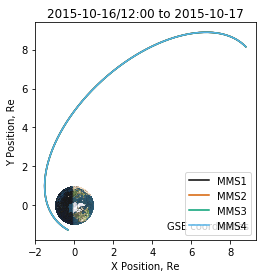

In [60]:
mms_orbit_plot(trange=['2015-10-16/12:00', '2015-10-17'])

## Testing

We have a large test suite that is automatically ran on a macOS instance in the cloud with every commit; the status can be found at:

https://github.com/spedas/pyspedas

For MMS, we currently have >90% test coverage

We also have validation tests as part of our IDL test suite; these load some data in IDL and Python and compare the results, and are ran whenever I run the full IDL test suite.

## More MMS examples

You can find more MMS examples at:

https://github.com/spedas/mms-examples

Clicking the images should take you to a Jupyter notebook that produces that figure

## Other missions

We have initial support for the following missions using this same `pyspedas.mission.instrument()` syntax:

- Advanced Composition Explorer (ACE)
- Arase (ERG)
- Cluster
- Colorado Student Space Weather Experiment (CSSWE)
- Deep Space Climate Observatory (DSCOVR)
- Equator-S
- Fast Auroral Snapshot Explorer (FAST)
- Geotail
- Geostationary Operational Environmental Satellite (GOES)
- Imager for Magnetopause-to-Aurora Global Exploration (IMAGE)
- Mars Atmosphere and Volatile Evolution (MAVEN)
- Magnetic Induction Coil Array (MICA)
- Magnetospheric Multiscale (MMS)
- OMNI
- Polar Orbiting Environmental Satellites (POES)
- Polar
- Parker Solar Probe (PSP)
- Van Allen Probes (RBSP)
- Solar Terrestrial Relations Observatory (STEREO)
- Time History of Events and Macroscale Interactions during Substorms (THEMIS)
- Two Wide-Angle Imaging Neutral-Atom Spectrometers (TWINS)
- Ulysses
- Wind


MMS is the furthest along. We're planning on having a multi-mission webinar this month, where we'll show data loaded from several of these. 

To find more information and examples for other missions, please see the READMEs (by clicking on the mission name on the index page at GitHub):

https://github.com/spedas/pyspedas

## How to contribute

Try it out! And please report bugs, missing documentation, or any other issues so that we can fix them (feel free to email me or submit them through GitHub issues). If there's a missing dataset or analysis tool that you would like to see included, please let us know! 